In [1]:
# 初次安装时运行此代码
# !pip install pycaret
# !pip install shap

说明文档

https://pycaret.readthedocs.io/en/latest/api/classification.html

模型是用了sklearn，相关参数可以在下面链接中搜

https://scikit-learn.org/stable/modules/classes.html

## 导入安装包

In [2]:
import pandas as pd
import numpy as np

from pycaret.classification import *

## 读取数据

1) csv 数据读取格式：

pd.read_csv("xxx.csv")

pd.read_csv("xxx.csv", encoding='gb18030')

pd.read_csv("xxx.csv", encoding='utf-8')

如有需要，添加参数 engine='python'

2) xlsx读取格式：

pd.read_excel("xxx.xlsx")

In [3]:
df = pd.read_excel("电信客户流失.xlsx")

In [4]:
# 查看下数据
df.head()

,地区,用时,年龄,婚姻,住址,收入,学历,工龄,退休,性别,人口,免费,设备,电话卡,无线,长途_近期,免费_近期,设备_近期,电话卡_近期,无线_近期,长途_长期,免费_长期,设备_长期,电话卡_长期,无线_长期,多线,语音,传真,互联网,来电显示,来电等待,回拨,三方通话,手机支付,长途日志,免费服务日志,设备日志,电话卡日志,无线日志,收入日志,类型,流失
0,2,13,44,1,9,64,4,5,0,0,2,0,0,1,0,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,0,0,0,0,0,0,1,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,6,1,0,1,1,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,0,1,1,0,1,1,1,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,2,1,0,1,0,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,0,0,0,0,1,1,0,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,1,0,0,0,0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,4,0,0,0,0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,0,0,0,0,1,0,1,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0


In [5]:
df.describe()

,地区,用时,年龄,婚姻,住址,收入,学历,工龄,退休,性别,人口,免费,设备,电话卡,无线,长途_近期,免费_近期,设备_近期,电话卡_近期,无线_近期,长途_长期,免费_长期,设备_长期,电话卡_长期,无线_长期,多线,语音,传真,互联网,来电显示,来电等待,回拨,三方通话,手机支付,长途日志,免费服务日志,设备日志,电话卡日志,无线日志,收入日志,类型,流失
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,475.000000,386.000000,678.000000,296.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,0.474000,0.386000,0.678000,0.296000,11.723100,13.274000,14.219800,13.781000,11.583900,574.050050,551.258500,465.632850,605.773750,442.736900,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,0.371000,2.182110,3.239705,3.568092,2.854209,3.598296,3.957203,2.487000,0.274000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,0.499573,0.487074,0.467477,0.456719,10.363486,16.902122,19.068539,14.084496,19.719426,789.974346,915.746733,857.273071,830.126069,971.471264,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,0.483314,0.734552,0.413813,0.277556,0.557286,0.367286,0.803754,1.120306,0.446232
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.105361,1.749200,2.734368,1.011601,2.701361,2.197225,1.000000,0.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,90.137500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.648659,2.970414,3.367727,2.463853,3.333543,3.367296,1.000000,0.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,8.525000,0.000000,0.000000,12.000000,0.000000,285.475000,0.000000,0.000000,332.500000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.142999,3.208825,3.572344,2.847812,3.594569,3.850148,3.000000,0.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,755.025000,846.900000,579.450000,910.000000,316.500000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.668095,3.488903,3.757414,3.208825,3.861780,4.418841,3.000000,1.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,7257.600000,5916.000000,5028.650000,7515.000000,7856.850000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.604670,5.153292,4.352855,4.693639,4.718052,7.419381,4.000000,1.000000


In [6]:
# 稍微处理下数据
df = df[['地区', '用时', '年龄', '婚姻', '收入', '学历', '工龄', '退休', '性别', '类型', '三方通话', '手机支付', '流失']] # 筛选几个变量

## 在数据准备好以后，开始建模

## 第一步：初始化配置

**data**填入 数据集名称 （**必填**）

**target**填入 因变量名称 （**必填**）

其它常用**可填**参数：

**train_size**: 训练集占比，默认值 0.7

**test_data**：测试数据。输入测试数据，会忽略train_size对数据的划分，此时传入的data为训练数据。

**normalize**: True/False, 是否对数值型数进行标准化

**normalize_method**: 标准化方法：'zscore'，'minmax', 'maxabs', 'robust'

**fold_strategy**: 交叉验证策略， 默认为'stratifiedkfold'，可选'kfold'，'stratifiedkfold'，'groupkfold'，'timeseries'

**fold**: K折交叉验证的K

**fix_imbalance**：数据不平衡时设置为True，将采用SMOTE方法为样本较少的类别合成新数据

**session_id**: seed。最好设置一下，否则每次跑的结果都不一样

另外的一些参数，如设置PCA降维，去除异常值，特征选择等，请看详细的说明文档

In [7]:
clf = setup(data=df, target='流失')
# 在确定各设置无误后，按下enter键

,Description,Value
0,session_id,7509
1,Target,流失
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
models() # 列出可用的建模方法

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 第二步——可选步骤：比较所有模型（通过交叉验证）

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7654,0.7769,0.4126,0.6190,0.4920,0.3483,0.3619,0.0450
catboost,CatBoost Classifier,0.7625,0.7689,0.3968,0.6176,0.4801,0.3360,0.3514,7.9000
ridge,Ridge Classifier,0.7597,0.0000,0.3555,0.6272,0.4484,0.3104,0.3335,0.0630
lr,Logistic Regression,0.7525,0.7811,0.3916,0.5902,0.4655,0.3139,0.3278,1.4980
ada,Ada Boost Classifier,0.7482,0.7695,0.4276,0.5677,0.4857,0.3233,0.3303,0.2650
gbc,Gradient Boosting Classifier,0.7482,0.7851,0.3971,0.5847,0.4674,0.3100,0.3233,0.2650
rf,Random Forest Classifier,0.7425,0.7533,0.3155,0.5647,0.4005,0.2555,0.2743,0.9370
et,Extra Trees Classifier,0.7354,0.7146,0.3253,0.5524,0.4015,0.2480,0.2660,0.7090
lightgbm,Light Gradient Boosting Machine,0.7296,0.7431,0.3968,0.5202,0.4484,0.2740,0.2793,0.1380
knn,K Neighbors Classifier,0.7210,0.6976,0.3508,0.5049,0.4080,0.2350,0.2443,0.2140


In [10]:
# 返回的是最好的那个模型
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

也可以指定几个模型进行比较，使用include参数

best_model = compare_models(include = ['dt','rf','et'])

## 第三步：创建模型（在create_model中填入你想要创建的模型）

可以参考上面的compare_models的结果，可以创建自己想要研究的模型

#### 可选模型：

‘lr’ - Logistic Regression

‘knn’ - K Neighbors Classifier

‘nb’ - Naive Bayes

‘dt’ - Decision Tree Classifier

‘svm’ - SVM - Linear Kernel

‘rbfsvm’ - SVM - Radial Kernel

‘gpc’ - Gaussian Process Classifier

‘mlp’ - MLP Classifier

‘ridge’ - Ridge Classifier

‘rf’ - Random Forest Classifier

‘qda’ - Quadratic Discriminant Analysis

‘ada’ - Ada Boost Classifier

‘gbc’ - Gradient Boosting Classifier

‘lda’ - Linear Discriminant Analysis

‘et’ - Extra Trees Classifier

‘xgboost’ - Extreme Gradient Boosting

‘lightgbm’ - Light Gradient Boosting Machine

‘catboost’ - CatBoost Classifier

In [11]:
lr_classifier = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8143,0.8266,0.4211,0.8000,0.5517,0.4485,0.4852
1,0.7857,0.8390,0.3684,0.7000,0.4828,0.3636,0.3934
2,0.7286,0.8122,0.4737,0.5000,0.4865,0.3022,0.3024
3,0.8000,0.7595,0.5263,0.6667,0.5882,0.4586,0.4642
4,0.6714,0.7121,0.1579,0.3000,0.2069,0.0242,0.0262
5,0.7857,0.8020,0.4000,0.7273,0.5161,0.3931,0.4220
6,0.7714,0.7860,0.4500,0.6429,0.5294,0.3846,0.3953
7,0.6857,0.7420,0.3000,0.4286,0.3529,0.1538,0.1581
8,0.7143,0.7410,0.4500,0.5000,0.4737,0.2784,0.2791
9,0.7681,0.7905,0.3684,0.6364,0.4667,0.3317,0.3519


In [12]:
lr_classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7509, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

也可以自定义参数传入，如

In [13]:
lr_classifier2 = create_model('lr', C=0.001, random_state=3572)
                       
lr_classifier2

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7571,0.8225,0.3684,0.5833,0.4516,0.3057,0.3190
1,0.7429,0.7998,0.1579,0.6000,0.2500,0.1544,0.2049
2,0.8143,0.8060,0.5263,0.7143,0.6061,0.4882,0.4979
3,0.7286,0.7276,0.3158,0.5000,0.3871,0.2240,0.2338
4,0.7143,0.7430,0.1579,0.4286,0.2308,0.0991,0.1178
5,0.7714,0.7710,0.3000,0.7500,0.4286,0.3171,0.3692
6,0.7143,0.7960,0.2500,0.5000,0.3333,0.1765,0.1936
7,0.7429,0.7260,0.4000,0.5714,0.4706,0.3077,0.3162
8,0.7286,0.6550,0.3500,0.5385,0.4242,0.2570,0.2672
9,0.7536,0.7421,0.2632,0.6250,0.3704,0.2476,0.2835


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3572, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 第四步——可选步骤：对create的model进行调参

n_iter: 网格搜索的迭代次数。默认是10，可增大次数。

optimize：调参度量方式，默认'Accuracy'，可选'AUC'，'Recall', 'Prec.', 'F1', 'Kappa', 'MCC'

默认调参方式为网格搜索，更多搜索方法见说明文档

In [14]:
tuned_lr_classifier = tune_model(lr_classifier, optimize='Accuracy', n_iter=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8143,0.8287,0.4211,0.8000,0.5517,0.4485,0.4852
1,0.7857,0.8380,0.3684,0.7000,0.4828,0.3636,0.3934
2,0.7286,0.8122,0.4737,0.5000,0.4865,0.3022,0.3024
3,0.8000,0.7616,0.5263,0.6667,0.5882,0.4586,0.4642
4,0.6714,0.7100,0.1579,0.3000,0.2069,0.0242,0.0262
5,0.8000,0.8010,0.4000,0.8000,0.5333,0.4235,0.4648
6,0.7857,0.7860,0.5000,0.6667,0.5714,0.4324,0.4404
7,0.6857,0.7430,0.3000,0.4286,0.3529,0.1538,0.1581
8,0.7143,0.7430,0.4500,0.5000,0.4737,0.2784,0.2791
9,0.7826,0.7895,0.3684,0.7000,0.4828,0.3615,0.3914


In [15]:
# 输出调参后的模型
tuned_lr_classifier

LogisticRegression(C=1.762, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7509, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 第五步：模型评价

‘auc’ - Area Under the Curve

‘threshold’ - Discrimination Threshold

‘pr’ - Precision Recall Curve

‘confusion_matrix’ - Confusion Matrix

‘error’ - Class Prediction Error

‘class_report’ - Classification Report

‘boundary’ - Decision Boundary

‘rfe’ - Recursive Feature Selection

‘learning’ - Learning Curve

‘manifold’ - Manifold Learning

‘calibration’ - Calibration Curve

‘vc’ - Validation Curve

‘dimension’ - Dimension Learning

‘feature’ - Feature Importance

‘feature_all’ - Feature Importance (All)

‘parameter’ - Model Hyperparameter

‘lift’ - Lift Curve

‘gain’ - Gain Chart

‘tree’ - Decision Tree

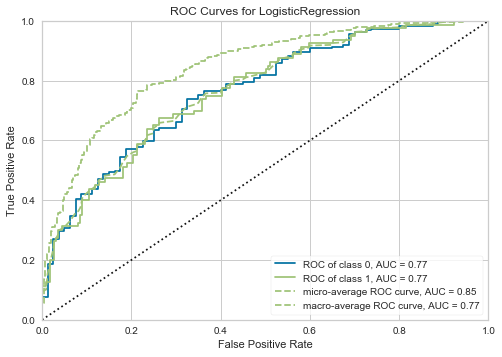

In [16]:
plot_model(tuned_lr_classifier, plot='auc')

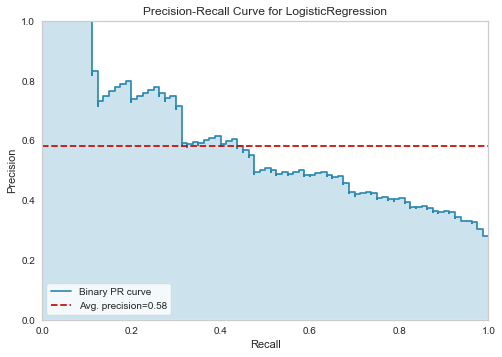

In [17]:
plot_model(tuned_lr_classifier, plot='pr')

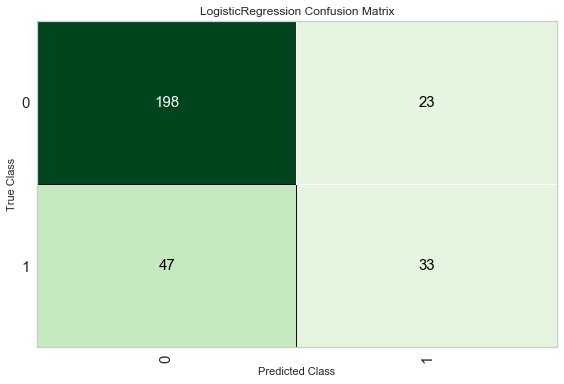

In [18]:
plot_model(tuned_lr_classifier,plot='confusion_matrix')

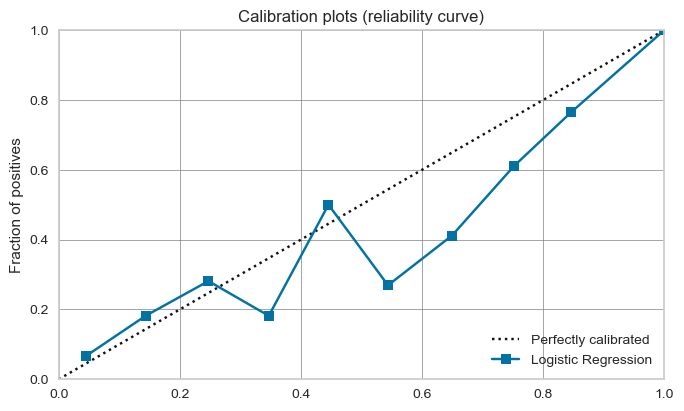

In [19]:
plot_model(tuned_lr_classifier,plot='calibration')

### 汇总输出

In [20]:
evaluate_model(tuned_lr_classifier)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 模型解释

plot: str, default = ‘summary’. Type of plot. Available options are: ‘summary’, ‘correlation’, and ‘reason’.

只支持( dt, xgboost, et, lightgbm, catboost, rf)

In [21]:
# interpret_model(tuned_lr_classifier, plot='reason')

### 也可以对创建的模型/调参后的模型进行校准，只需将校准对象输入

method: str, default = ‘sigmoid’
The method to use for calibration. Can be ‘sigmoid’ which corresponds to Platt’s method or ‘isotonic’ which is a non-parametric approach.

In [22]:
calibrated_lr = calibrate_model(tuned_lr_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8256,0.3684,0.7778,0.5000,0.3943,0.4374
1,0.7857,0.8390,0.3158,0.7500,0.4444,0.3380,0.3866
2,0.7000,0.8111,0.3684,0.4375,0.4000,0.2020,0.2033
3,0.8143,0.7616,0.5263,0.7143,0.6061,0.4882,0.4979
4,0.6857,0.7079,0.1579,0.3333,0.2143,0.0482,0.0535
5,0.7571,0.8010,0.2500,0.7143,0.3704,0.2609,0.3162
6,0.7429,0.7860,0.3500,0.5833,0.4375,0.2841,0.2997
7,0.7000,0.7400,0.2500,0.4545,0.3226,0.1503,0.1614
8,0.7571,0.7430,0.4500,0.6000,0.5143,0.3568,0.3633
9,0.7971,0.7926,0.3684,0.7778,0.5000,0.3925,0.4356


In [23]:
calibrated_lr

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.762,
                                                         class_weight={},
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=1000,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=7509,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                             

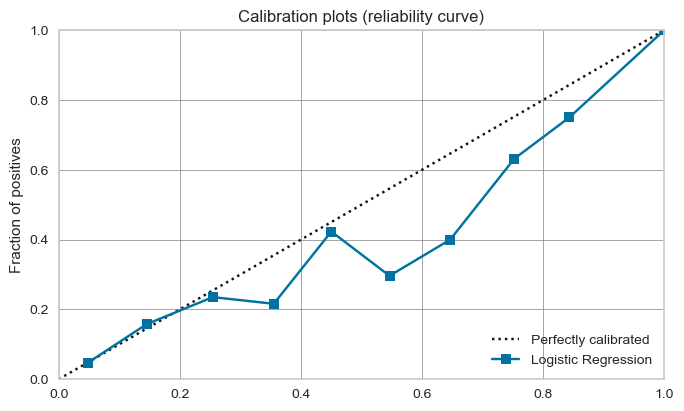

In [24]:
plot_model(calibrated_lr, plot='calibration')

### 模型对比

https://www.bioinfo-scrounger.com/archives/Diagnose-evaluation/

https://www.jianshu.com/p/3995e3312a90

https://www.sohu.com/a/228629336_489312

NRI =（灵敏度new - 灵敏度old）+（特异度new - 特异度old）=（灵敏度new + 特异度new）-（灵敏度old + 特异度old）   

IDI = （Pnew_events - Pold_events）- （Pnew_non-events - Pold_non-events）

其中Pnew_events、Pold_events表示在患者组中，新模型和旧模型对于每个个体预测疾病发生概率的平均值

In [25]:
from sklearn.metrics import confusion_matrix

def calculate_metric(y_test, y_pred): 
    confusion = confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    Sensitivity = TP / float(TP + FN)
    Specificity = TN / float(TN + FP)
    return Sensitivity, Specificity

In [26]:
predictions0 = predict_model(calibrated_lr, verbose=False) 
predictions1 = predict_model(tuned_lr_classifier, verbose=False) 

Sensitivity0, Specificity0 = calculate_metric(predictions0[['流失']].astype('int'), predictions0[['Label']])
Sensitivity1, Specificity1 = calculate_metric(predictions1[['流失']].astype('int'), predictions1[['Label']])

NRI = (Sensitivity1 - Sensitivity0) + (Specificity1 - Specificity0)
print('NRI:', NRI)

Pnew_events = (1 - predictions1[predictions1['流失'] == '1']['Score']).mean()
Pold_events = (1 - predictions0[predictions0['流失'] == '1']['Score']).mean()
Pnew_nonevents = (1 - predictions1[predictions1['流失'] == '0']['Score']).mean()
Pold_nonevents = (1 - predictions0[predictions0['流失'] == '0']['Score']).mean()
IDI = (Pnew_events - Pold_events) - (Pnew_nonevents - Pold_nonevents)
print('IDI:', IDI)

NRI: 0.04440045248868785
IDI: -0.007935955882352907


## 第六步：模型预测

In [27]:
predictions = predict_model(calibrated_lr) 
# 版本问题可能会有报错，不用在意

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7641,0.7663,0.3500,0.5957,0.4409,0.3040,0.3213


In [28]:
# 用于预测未知的数据集
# predictions = predict_model(final_lr, data = unseen_data)

## 第七步——可进行：得到最终模型（使用全部数据训练）

In [29]:
final_lr = finalize_model(tuned_lr_classifier)

In [30]:
final_lr

LogisticRegression(C=1.762, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7509, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)